from google.colab import drive

# Mount Google Drive (authentication required)
drive.mount('/content/gdrive')


In [1]:
from google.colab import drive

# Mount Google Drive (authentication required)
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas as pd

df = pd.read_csv('ds.csv', usecols=['ID', 'Disease_Risk']).head(12)
df

,ID,Disease_Risk
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,0


In [ ]:
from google.colab import drive

# Mount Google Drive (authentication required)
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import cv2
import numpy as np

# Example: Load one image
image_path = '/content/gdrive/MyDrive/Images/0.png'
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = image / 255.0  # Normalize pixel values


In [5]:
image_paths = ['/content/gdrive/MyDrive/Images/0.png',
              '/content/gdrive/MyDrive/Images/1.png',
              '/content/gdrive/MyDrive/Images/2.png',
              '/content/gdrive/MyDrive/Images/3.png',
              '/content/gdrive/MyDrive/Images/4.png',
              '/content/gdrive/MyDrive/Images/5.png',
              '/content/gdrive/MyDrive/Images/6.png',
              '/content/gdrive/MyDrive/Images/7.png',
              '/content/gdrive/MyDrive/Images/8.png',
              '/content/gdrive/MyDrive/Images/9.png',
              '/content/gdrive/MyDrive/Images/10.png',
              '/content/gdrive/MyDrive/Images/11.png',
              '/content/gdrive/MyDrive/Images/12.png']


In [6]:

labels = [df['Disease_Risk'].head(12)]  # Example labels (1 for disease risk, 0 for no risk)

# Load and preprocess all images
images = []
for path in image_paths:
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    images.append(img)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [ ]:
images

array([[[[0.00784314, 0.        , 0.00392157],
         [0.01176471, 0.00392157, 0.00784314],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.01176471, 0.00392157, 0.00784314],
         [0.00392157, 0.        , 0.        ],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ]

In [7]:

labels

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]])

In [8]:
labels=[1,1,1, 1, 1, 1, 1, 1, 1, 0, 1, 1,0]

In [9]:
print(len(images))  # Check the number of images
print(len(labels))  # Check the number of labels


13
13


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense (fully connected) layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout for regularization
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    return model


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming images and labels are already loaded and preprocessed
# Convert lists to NumPy arrays if needed
images = np.array(images)
labels = np.array(labels)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify the shapes of the training and validation sets
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# Define the input shape based on your images
input_shape = x_train[0].shape

# Create the CNN model
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model using the manually split training and validation sets
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Training data shape: (10, 224, 224, 3)
Validation data shape: (3, 224, 224, 3)
Training labels shape: (10,)
Validation labels shape: (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)  

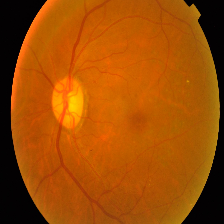

In [12]:
from PIL import Image

# Example: Load and preprocess a new image
new_image_path = '/content/gdrive/MyDrive/Images/1.png'
# Replace 'path/to/your/image.jpg' with the actual path to your image
img = Image.open(new_image_path)
img




In [13]:
# Example: Load and preprocess a new image for prediction

new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (224, 224))
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
new_image = new_image / 255.0  # Normalize pixel values

# Make predictions
prediction = model.predict(np.expand_dims(new_image, axis=0))
predicted_class = 1 if prediction > 0.5 else 0

# Interpret the prediction
if predicted_class == 0:
    print("No diabetic retinopathy detected.")
else:
    print("Diabetic retinopathy detected.")


1/1 [==============================] - 0s 381ms/step
Diabetic retinopathy detected.


In [14]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained TensorFlow/Keras model
model.save('diabetic_retinopathy_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
pip install flask

In [ ]:
import os
import cv2
import numpy as np
from flask import Flask, render_template, request, jsonify
from tensorflow.keras.models import load_model

app = Flask(__name__)
model = load_model('diabetic_retinopathy_model.h5')

def preprocess_image(image):
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0
    return np.expand_dims(image, axis=0)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image uploaded'}), 400

    file = request.files['image']

    if file.filename == '':
        return jsonify({'error': 'Empty filename'}), 400

    allowed_extensions = {'png', 'jpg', 'jpeg'}
    if not (file.filename.split('.')[-1].lower() in allowed_extensions):
        return jsonify({'error': 'Invalid file format'}), 400

    try:
        img = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_COLOR)
        processed_img = preprocess_image(img)
    except Exception as e:
        return jsonify({'error': f'Error processing image: {str(e)}'}), 500

    prediction = model.predict(processed_img)
    result = 'Diabetic Retinopathy Detected' if prediction > 0.5 else 'No Diabetic Retinopathy Detected'

    return jsonify({'prediction': result})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
